<a href="https://colab.research.google.com/github/Ulyssesbebem/Tarefas/blob/main/Tarefa%202%20Refinada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import zipfile
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, BatchNormalization, ZeroPadding2D, MaxPool2D, Activation, add
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from glob import glob
tf.__version__


'2.12.0'

In [2]:
!gdown --id 1L4mdCDBgybKqr5Wo-kqT8HXcBJ9HXqSX

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1L4mdCDBgybKqr5Wo-kqT8HXcBJ9HXqSX
To: /content/trash_nov_22_2018.zip
100% 42.8M/42.8M [00:00<00:00, 137MB/s]


In [3]:
FILE='trash_nov_22_2018.zip'

In [4]:
archive = zipfile.ZipFile('trash_nov_22_2018.zip', 'r')
archive.extractall()

In [5]:
img_name=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)

In [6]:
Img_Size = 80
ref = 'jpg'
notref = 'met'

In [7]:
X= []
Y =[]
n = len(img_name)
i = 0
for i in range(n):
  name = img_name[i]
  if(ref in name):
    Y.append(name)
    #X.append(cv2.imread(name,0))
    #img = cv2.cvtColor(cv2.imread(name), cv2.COLOR_BGR2RGB)
    img = cv2.resize(cv2.imread(name), (224, 224))
    X.append(img)
m = len(Y)
X = np.array(X)
print(n,m)

2527 2527


In [8]:
name[-3:]

'jpg'

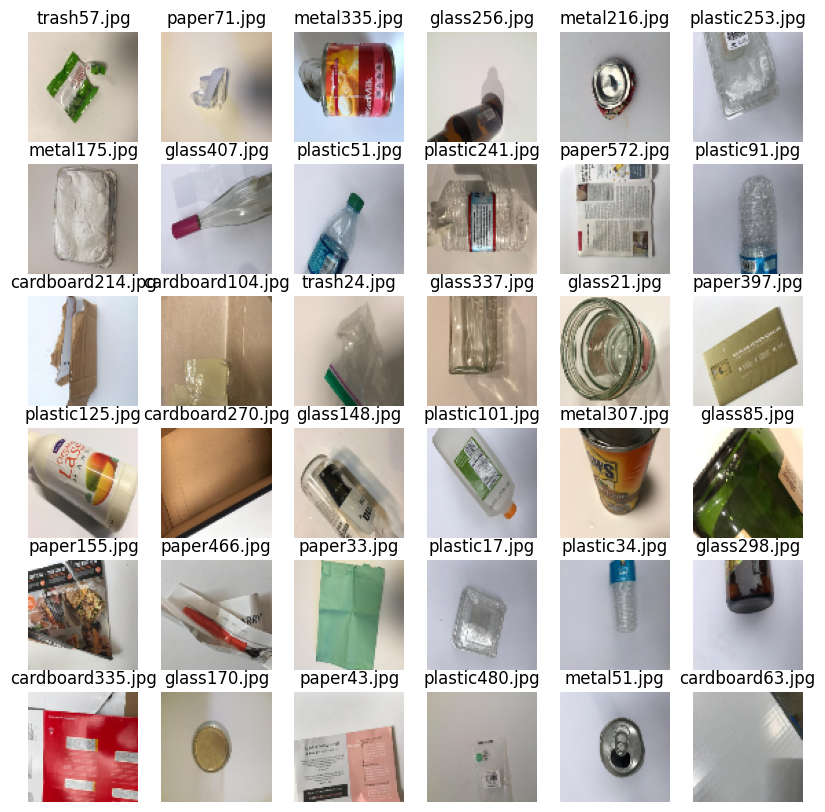

In [9]:
plt.figure(figsize=(10, 10))
m = len(Y)
for i in range(36):
  ax = plt.subplot(6, 6, i + 1)
  idx = np.random.randint(m)
  RGB_img = cv2.cvtColor(X[idx], cv2.COLOR_BGR2RGB)
  resized = cv2.resize(RGB_img, (Img_Size,Img_Size))
  plt.imshow(resized)
  plt.title(Y[idx])
  plt.axis("off")

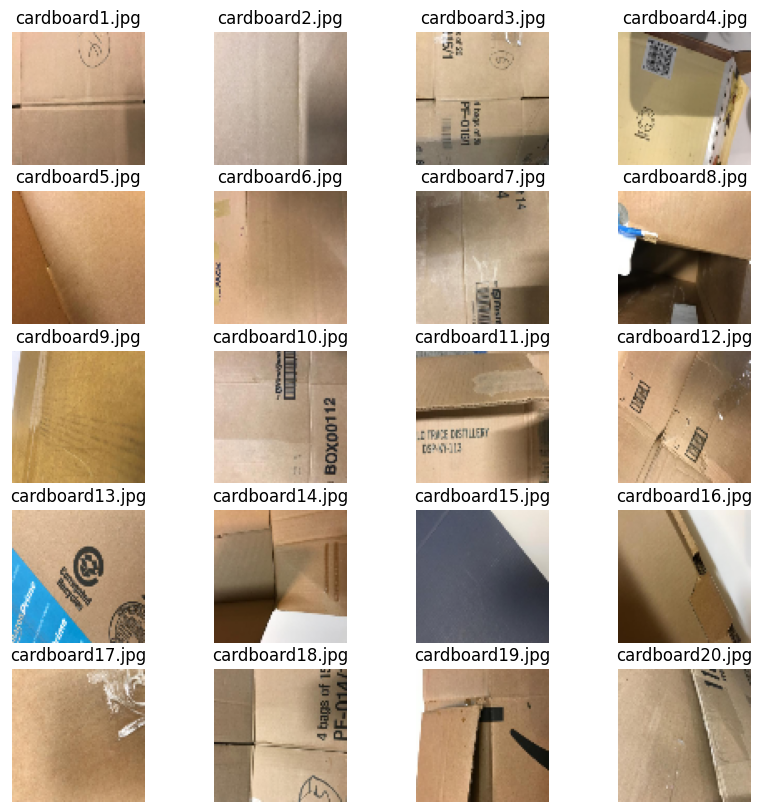

In [10]:
plt.figure(figsize=(10, 10))
X_test = X
Y_test = Y
for i in range(20):
  ax = plt.subplot(5, 4, i + 1)
  RGB_img = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB)
  resized = cv2.resize(RGB_img, (Img_Size,Img_Size))
  plt.imshow(resized)
  plt.title(Y_test[i])
  plt.axis("off")

In [11]:
nome = Y[0]

In [12]:
nome [0:4]

'card'

In [13]:
lista =[]
for word in Y:
  lista.append(word[0:4])



In [14]:
set(lista)

{'card', 'glas', 'meta', 'pape', 'plas', 'tras'}

In [15]:
classes = list(set(lista))

In [16]:
y_data = []
for word in Y:
  if word[0:4]==classes[0]:
    y_data.append(0)
  elif word[0:4]==classes[1]:
    y_data.append(1)
  elif word[0:4]==classes[2]:
    y_data.append(2)
  elif word[0:4]==classes[3]:
    y_data.append(3)
  elif word[0:4]==classes[4]:
    y_data.append(4)
  else:
    y_data.append(5)

In [17]:
y_data

[3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,


In [18]:
Y=y_data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.18, random_state=40)

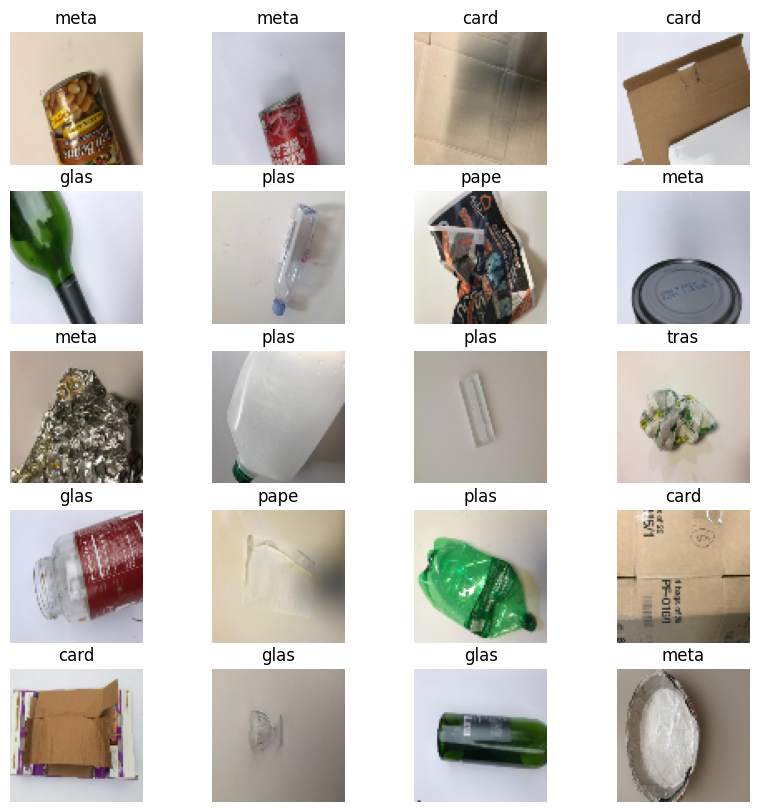

In [20]:
plt.figure(figsize=(10, 10))
for i in range(20):
  ax = plt.subplot(5, 4, i + 1)
  RGB_img = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB)
  resized = cv2.resize(RGB_img, (Img_Size,Img_Size))
  plt.imshow(resized)
  plt.title(classes[y_test[i]])
  plt.axis("off")

In [21]:
X_train[0].shape

(224, 224, 3)

In [22]:
df = pd.DataFrame({'class':y_train,})
y_train = pd.get_dummies(df['class'])
y_train

,0,1,2,3,4,5
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
2067,1,0,0,0,0,0
2068,1,0,0,0,0,0
2069,0,1,0,0,0,0
2070,0,1,0,0,0,0


In [23]:
num_classes = 6

In [24]:
for i in range(6):
  df_plot= df[(df["class"] == i)]
  n= df_plot.shape[0]
  print(classes[i],n)

pape 485
plas 401
tras 119
card 328
glas 412
meta 327


In [25]:
df = pd.DataFrame({'class':y_test})
y_test = pd.get_dummies(df['class'])
y_test

,0,1,2,3,4,5
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
450,1,0,0,0,0,0
451,0,0,0,0,0,1
452,0,0,0,0,0,1
453,0,0,0,0,0,1


In [26]:
D =len(classes)
base_learning_rate = 0.0005
optimizer_base = 'rms'
fine_tune_at = 20
epochs_base = 30

def model(base_learning_rate, epochs_base,optimizer_base, fine_tune_at = fine_tune_at ):

  model = MobileNetV2(weights='imagenet')
  model_output = Dense(D, activation= 'softmax') #'relu')
  model_output = model_output(model.layers[-2].output)
  model_input = model.input
  model_new = Model(inputs=model_input, outputs=model_output)

  # Freeze all the layers before the `fine_tune_at` layer
  for layer in model.layers[:fine_tune_at]:
    layer.trainable = False

  if optimizer_base == 'adam':
    model_new.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])
  elif optimizer_base == 'rms':
    model_new.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
                  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])
  else:
    pass
  r = model_new.fit(
      x=X_train,
      y=y_train,
      validation_data=(X_test, y_test),
      epochs=epochs_base,
      verbose=0
  )
  return


In [27]:
r  = model(base_learning_rate, epochs_base,optimizer_base)

14536120/14536120 [==============================] - 2s 0us/step


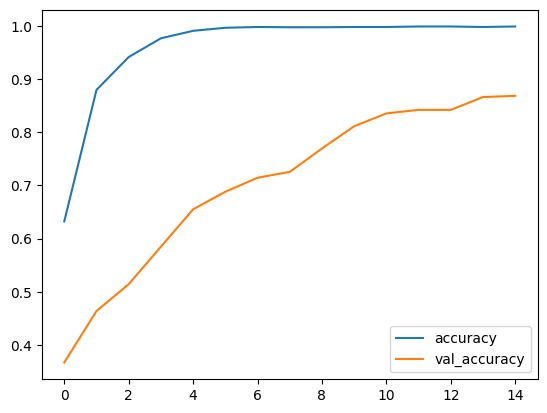

In [32]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

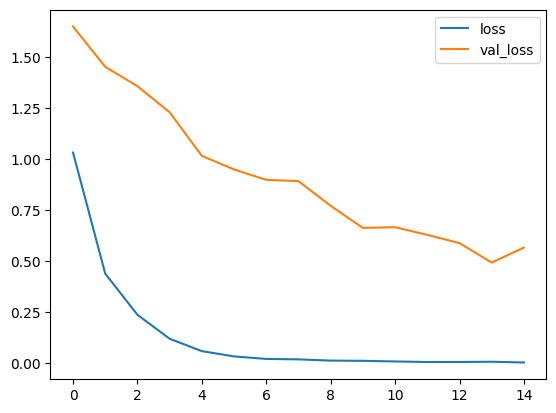

In [33]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

In [29]:
epochs_base = 15
model = MobileNetV2(weights='imagenet')
model_output = Dense(D, activation= 'softmax') #'relu')
model_output = model_output(model.layers[-2].output)
model_input = model.input
model_new = Model(inputs=model_input, outputs=model_output)
model_new.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
r = model_new.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_test, y_test),
    epochs=epochs_base,
    verbose=0
)

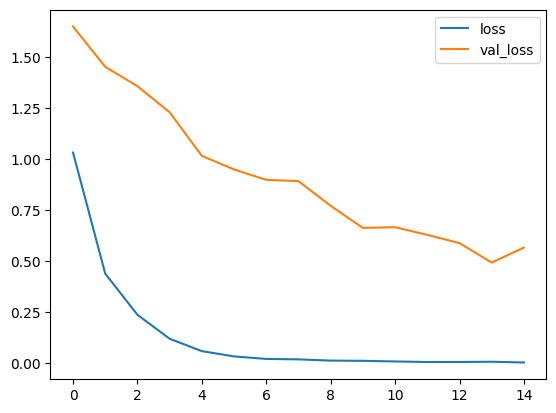

In [30]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

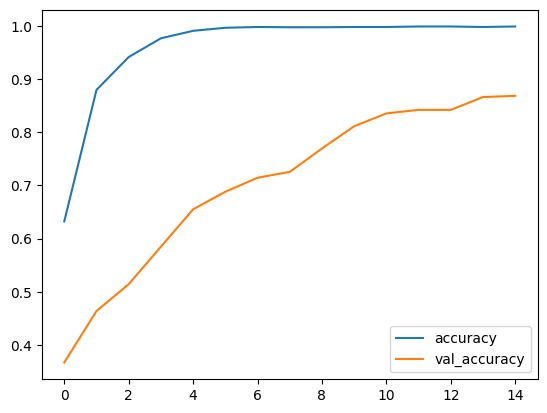

In [31]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [34]:
_, accuracy_test = model_new.evaluate(X_test,y_test)
print('accuracy test:',accuracy_test)

15/15 [==============================] - 1s 41ms/step - loss: 0.5679 - accuracy: 0.8681
accuracy test: 0.8681318759918213


In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
def retorna(y):
  resp = []
  for yi in y:
    vmax =max(yi)
    for idx, x in enumerate(yi):
      if(x == vmax):
        resp.append(idx)
  return resp

In [37]:
predict=model_new.predict(X_test)

15/15 [==============================] - 1s 38ms/step


In [38]:
predict[0].shape

(6,)

In [39]:
y_calc = retorna(predict)
y_test = retorna(np.array(y_test))

In [40]:
confusion_matrix(y_test, y_calc)

array([[97,  2,  3,  2,  0,  5],
       [ 3, 68,  2,  0,  0,  8],
       [ 2,  0, 14,  1,  0,  1],
       [ 5,  3,  0, 64,  0,  3],
       [ 1, 10,  0,  0, 73,  5],
       [ 1,  0,  0,  0,  3, 79]])

In [41]:
# Classification Report
print('\n\n', classification_report(y_test, y_calc, target_names=classes))



               precision    recall  f1-score   support

        pape       0.89      0.89      0.89       109
        plas       0.82      0.84      0.83        81
        tras       0.74      0.78      0.76        18
        card       0.96      0.85      0.90        75
        glas       0.96      0.82      0.88        89
        meta       0.78      0.95      0.86        83

    accuracy                           0.87       455
   macro avg       0.86      0.86      0.85       455
weighted avg       0.88      0.87      0.87       455

